# 1. Importing Packages

In [21]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

# 2. Defining Oracle and the Reflection operator
<!---defining ket notation for redering--->
 $\newcommand{\ket}[1]{\left|#1\right>}$
 
Implementation has been adapted/taken from this <a href="https://qiskit.org/textbook/ch-algorithms/grover.html#2.1-Qiskit-Implementation">section </a> in qiskit textbook

Our circuit is composed of three components the stat prep state, oracle and the reflection operator 

1. State prep: We do this to initialize our qubits such that our unknown winner state $\ket{\psi}$ has some probability of being there in our answer<br><br>

2. Oracle: It is a blackbox that encodes the positive case and negative case. Here we have implemented our oracle in this way. Their might be multiple ways in which this oracle can be defined.<br><br>

3. Reflection operator: This operator reflects the $\ket{s}$ state along the $\ket{s^|}$ axis and then reflects the resultant state along the $\ket{s}$ state. But in this particular case of 2 qubit system it is implemented a bit differently:

        a) The state $\ket{s}$ is mapped to the $\ket{0}$ state and then all the other states, except $\ket{0}$, are given a opposite sign.
        b) Then the resusltant vector is mapped back to it's original basis. This gives a reflected vector whose winner state probability is higher than other states, similar results are obtained in the  above general process.

In [6]:
def istate(qc):
    for q in range(qc.num_qubits):
        qc.h(q)
    return qc

def oracle(qc):
    '''We are making an oracle for the winner state of 11'''
    qc.cz(0,1)
    return qc

def ref_op(qc):
    n=qc.num_qubits
    for q in range(n):
        qc.h(q)
    
    for q in range(n):
        qc.z(q)
    
    qc.cz(0,1)
    
    for q in range(n):
        qc.h(q)
    
    return qc

# 3. Ruuning the code

## 3.1 Statevector Simulator

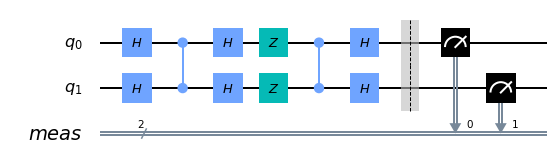

In [15]:
qc=QuantumCircuit(2)
qc=istate(qc)
qc=oracle(qc)
qc=ref_op(qc)
qc.measure_all()
qc.draw('mpl')

In [16]:
sv_sim = Aer.get_backend('statevector_simulator')
job_sim = execute(qc, sv_sim)
statevec = job_sim.result().get_statevector()
print(statevec)

[0.+0.0000000e+00j 0.+0.0000000e+00j 0.+0.0000000e+00j 1.-2.4492936e-16j]


## 3.2 Qasm Simulator

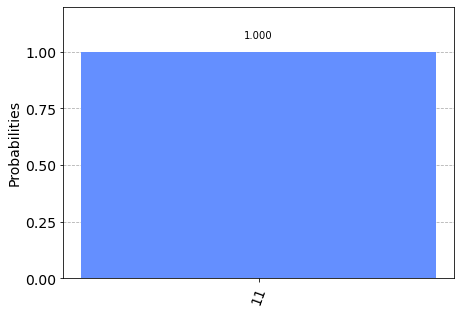

In [18]:
qasm_simulator = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(qc, backend=qasm_simulator, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

## 3.3 Real IBMQ device

In [20]:
provider= IBMQ.load_account()
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

C:\Users\deathstroke\.conda\envs\13aug_tf-gpu-cuda8\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


Running on current least busy device:  ibmqx2


In [22]:
job = execute(qc, backend=device, shots=1024, optimization_level=3)
job_monitor(job, interval = 2)

Job Status: job has successfully run


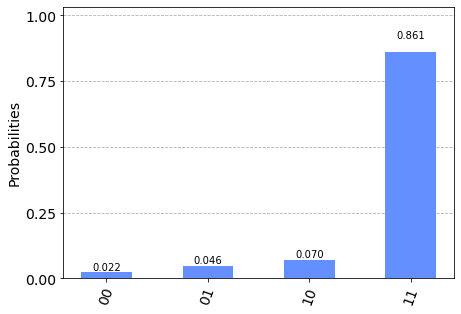

In [25]:
results = job.result()
answer = results.get_counts()
plot_histogram(answer)

In all of the three cases above we notice similar results and so we've successfully found key in a fixed number of iterations unlike classical data search methods which linearly scales up with increasing number of entries(n). 